# Hourly Energy Consumption

## Step 1:

#### Import Library

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


%matplotlib inline

In [2]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")


First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
Datetime    121273 non-null object
AEP_MW      121273 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



# Step 2:
## Reformat the Date Time Columns 

In [3]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


# Step 3:

In [4]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



### Lets us see the energy consumption Each Year

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

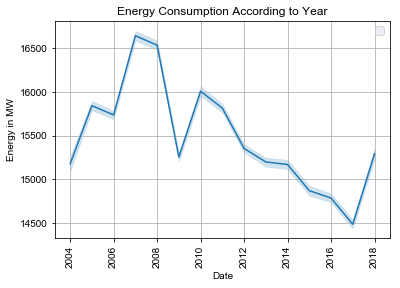

In [5]:


from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No handles with labels found to put in legend.


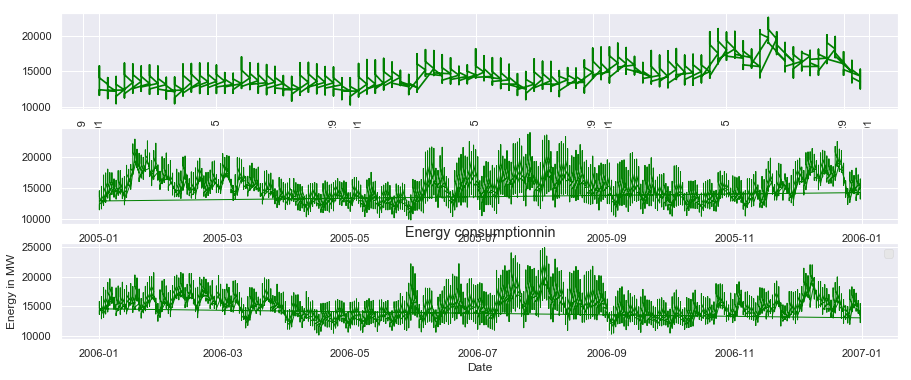

In [6]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


### Energy Distribution

Text(0.5, 1.0, 'Ennergy Distribution')

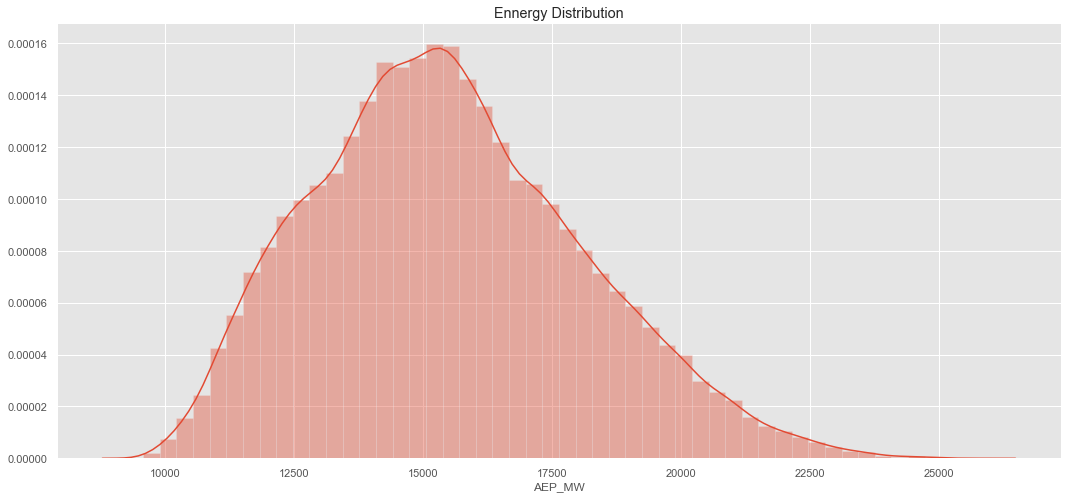

In [7]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

# Energy with Respect to Time 

No handles with labels found to put in legend.


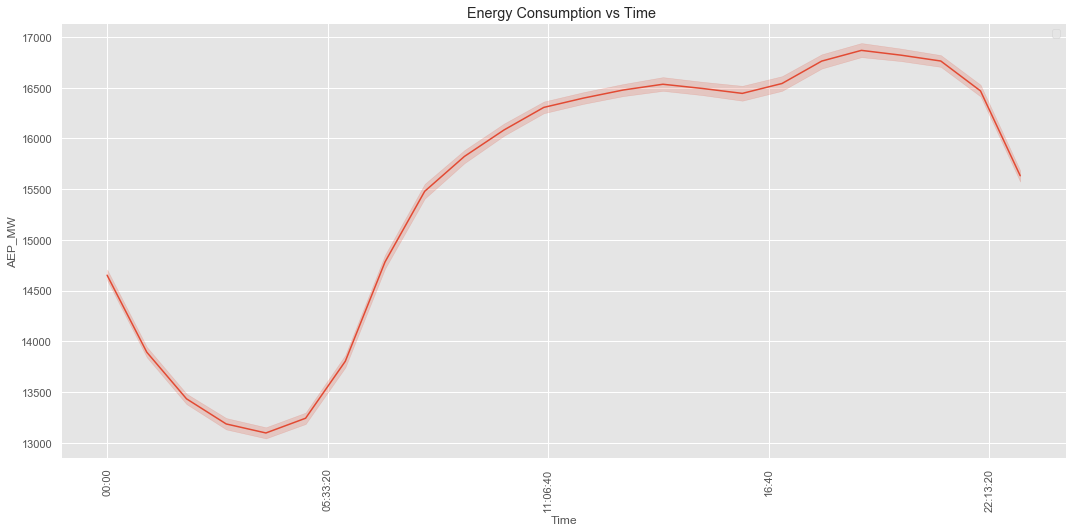

In [8]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Resampleing Data 

In [24]:
NewDataSet = dataset.resample('D').mean()

In [25]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [26]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]


In [27]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)


Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [28]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [29]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [30]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# Model

In [55]:

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [423]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
4935/4935 [==============================] - 33s 7ms/step - loss: 0.0237
Epoch 2/50
4935/4935 [==============================] - 33s 7ms/step - loss: 0.0183
Epoch 3/50
4935/4935 [==============================] - 34s 7ms/step - loss: 0.0173
Epoch 4/50
4935/4935 [==============================] - 34s 7ms/step - loss: 0.0164
Epoch 5/50
4935/4935 [==============================] - 35s 7ms/step - loss: 0.0157
Epoch 6/50
4935/4935 [==============================] - 34s 7ms/step - loss: 0.0160
Epoch 7/50
4935/4935 [==============================] - 34s 7ms/step - loss: 0.0151
Epoch 8/50
4935/4935 [==============================] - 35s 7ms/step - loss: 0.0125
Epoch 9/50
4935/4935 [==============================] - 34s 7ms/step - loss: 0.0099
Epoch 10/50
4935/4935 [==============================] - 34s 7ms/step - loss: 0.0089
Epoch 11/50
4935/4935 [==============================] - 34s 7ms/step - loss: 0.0085
Epoch 12/50
4935/4935 [==============================] - 34s 7ms/step - lo

# Test Data

In [31]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17


In [32]:
TestData.shape

(100, 4)

In [33]:
NewDataSet.shape

(5055, 4)

In [34]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [466]:
Df_Total.shape

(5155, 1)

In [467]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [468]:

inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [469]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [471]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

# Future Predicted 

In [474]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13671.706055
1,2018-04-27,12964.000000,12991.945312
2,2018-04-28,12237.583333,14521.591797
3,2018-04-29,12156.791667,13211.944336
4,2018-04-30,13443.500000,12788.455078
5,2018-05-01,13251.875000,13789.046875
6,2018-05-02,13641.166667,12804.154297
7,2018-05-03,14217.250000,12709.704102
8,2018-05-04,13725.625000,14261.728516
9,2018-05-05,11902.166667,14472.195312


In [476]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


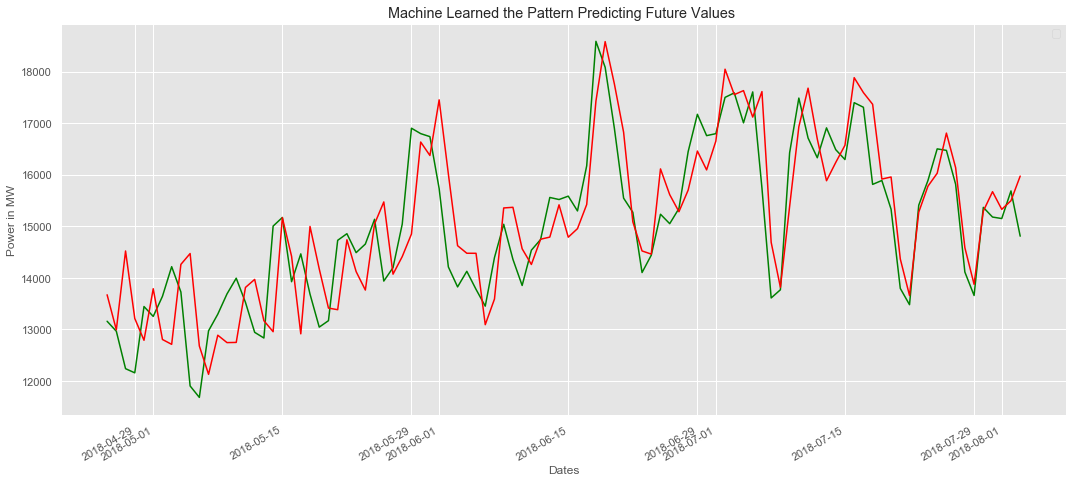

In [487]:

fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()


# Clustering 

In [39]:
print(dataset.shape)
print(dataset.head(2))

(121273, 7)
                      AEP_MW  Month  Year        Date      Time  Week     Day
Datetime                                                                     
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53  Friday
2004-12-31 02:00:00  12865.0     12  2004  2004-12-31  02:00:00    53  Friday


Text(0.5, 1.0, 'time vs energy ')

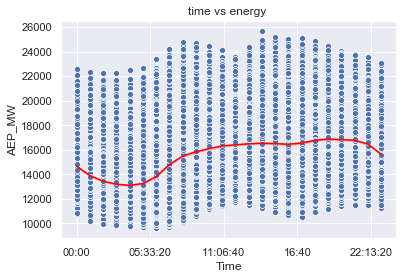

In [126]:
y = dataset["AEP_MW"]
x = dataset["Time"]

sns.scatterplot(x=x,y=y, data=dataset)
sns.lineplot(x=x,y=y,data=dataset, color="red")
sns.set(rc={'figure.figsize':(20,10)})
plt.title("time vs energy ")

In [63]:
print(y.values.shape)
print(y.values.reshape(-1,1))

(121273,)
[[13478.]
 [12865.]
 [12577.]
 ...
 [20820.]
 [20415.]
 [19993.]]


In [127]:
y = dataset["AEP_MW"]
x = dataset["Time"]

# Unsupervised Learning 
kmean = KMeans(n_clusters=3)
y = y.values.reshape(-1,1)
kmean.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [128]:
dataset["Cluster"] = kmean.labels_

In [116]:
dataset.head(2)

,AEP_MW,Month,Year,Date,Time,Week,Day,Cluster
Datetime,,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday,2
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday,2


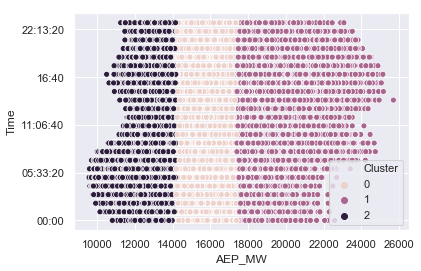

In [118]:
power = dataset["AEP_MW"]
time = dataset["Time"]

sns.scatterplot(x=power, y=time, data=dataset, hue="Cluster")

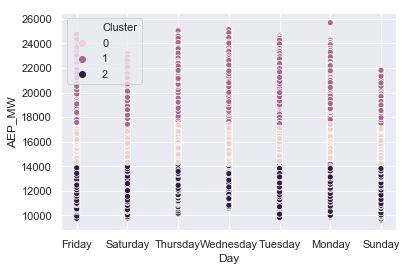

In [121]:
power = dataset["AEP_MW"]
year = dataset["Day"]

sns.scatterplot(x=year, y=power, data=dataset, hue="Cluster")

In [301]:
x = dataset[dataset["Cluster"] == 0]["AEP_MW"][0:3000].values
y = dataset[dataset["Cluster"] == 1]["AEP_MW"][0:3000].values
z = dataset[dataset["Cluster"] == 2]["AEP_MW"][0:3000].values
cluster = dataset["Cluster"][0:3000].values

print(x.shape)
print(y.shape)
print(z.shape)
print(cluster.shape)

(3000,)
(3000,)
(3000,)
(3000,)


In [302]:
style.use('ggplot')

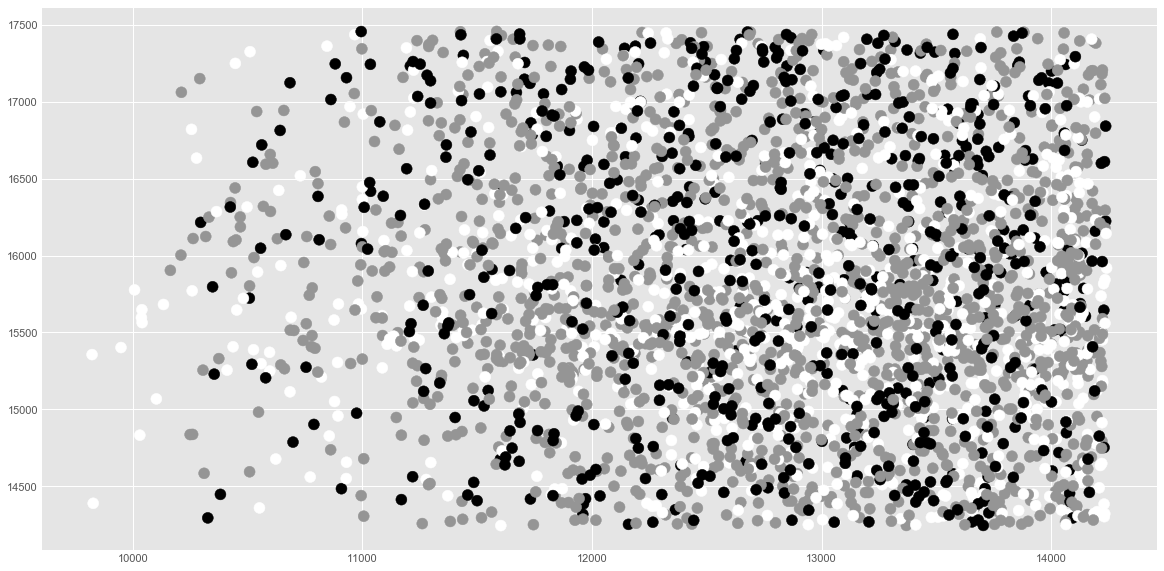

In [303]:
plt.scatter(x,y, s=120,  c =cluster)

Text(0.5, 0.92, 'Cluster 1 and Cluster 2')

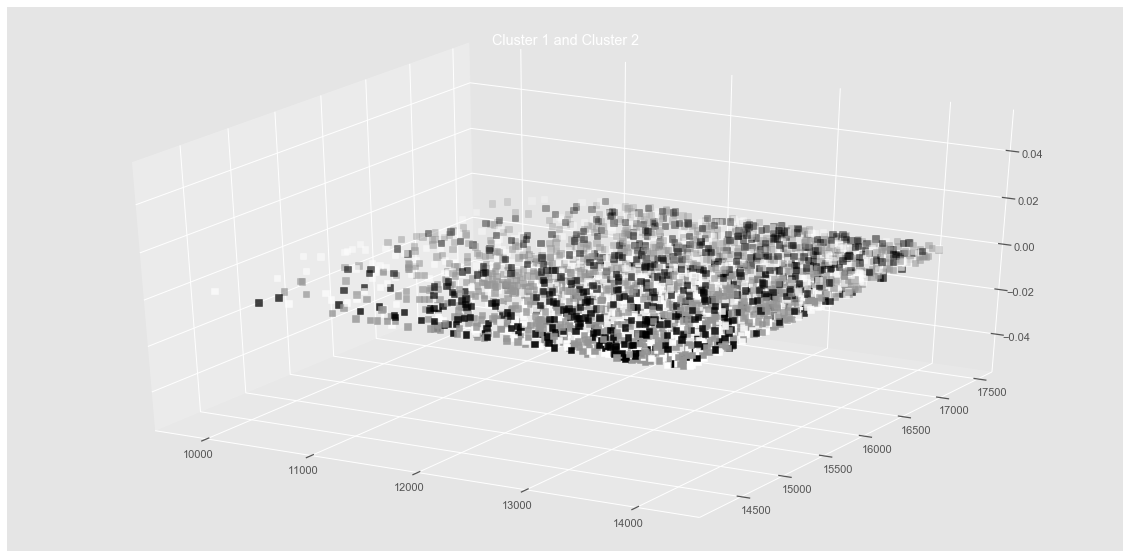

In [304]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,
           y,
           zs=0,
           marker="s", 
           s=40, 
           c = cluster.astype(float),
           depthshade=True,
           label='Cluster 1 and 2')
plt.title("Cluster 1 and Cluster 2")

